# Problem 4.1

In [1]:
# imports
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.ndimage import rotate
from sklearn.decomposition import PCA

## Intuition Flowchart

1. Given the template image
    1. We need to find the line along the main orientation of the image
    2. Make a list of the (x, y) values of all the black or white pixels in the image
    3. Run PCA on the list to get an axes passing through the maximum variance - this corresponds to the orientation (Ex: Along a slanted fish, the first PC will be through the fish)
2. For the query image
    1. Get a similar list as that in 1.1
    2. Run PCA and get 1st PC
    3. Now, the angle between the PCs of the template image and the query image will be the angle between their relative orientations.
3. Rotate the query image by the angle calculated in 2.3

## Code

In [2]:
image_files = []

for filename in os.listdir('q4-resources/kimia/'):
    if filename.endswith('.png'):
        image_files.append(os.path.join('q4-resources/kimia/', filename))

In [3]:
image_files.sort()
for i in range(len(image_files)):
    print(i, image_files[i])

0 q4-resources/kimia/bonefishes.png
1 q4-resources/kimia/bonefishesocc1.png
2 q4-resources/kimia/bunny04.png
3 q4-resources/kimia/calf1.png
4 q4-resources/kimia/calf2.png
5 q4-resources/kimia/cat1.png
6 q4-resources/kimia/cat2.png
7 q4-resources/kimia/cow1.png
8 q4-resources/kimia/cow2.png
9 q4-resources/kimia/desertcottontail.png
10 q4-resources/kimia/dog1.png
11 q4-resources/kimia/dog2.png
12 q4-resources/kimia/dog3.png
13 q4-resources/kimia/dogfishsharks.png
14 q4-resources/kimia/donkey1.png
15 q4-resources/kimia/dude0.png
16 q4-resources/kimia/dude1.png
17 q4-resources/kimia/dude10.png
18 q4-resources/kimia/dude11.png
19 q4-resources/kimia/dude12.png
20 q4-resources/kimia/dude2.png
21 q4-resources/kimia/dude4.png
22 q4-resources/kimia/dude5.png
23 q4-resources/kimia/dude6.png
24 q4-resources/kimia/dude7.png
25 q4-resources/kimia/dude8.png
26 q4-resources/kimia/easterncottontail.png
27 q4-resources/kimia/f15.png
28 q4-resources/kimia/f16.png
29 q4-resources/kimia/f16occ1.png
30 q4-r

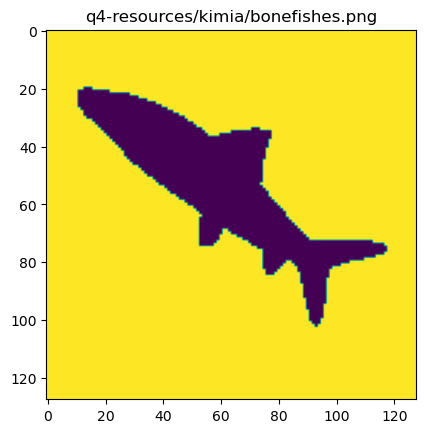

In [4]:
# seeing a random image
rand_ind = 0
pil_image = Image.open(image_files[rand_ind])
image_array = np.array(pil_image)
plt.imshow(image_array)
plt.title(image_files[rand_ind])
plt.show()

In [5]:
def get_black_points(image_array):
    return_array = []
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            if image_array[i][j] == 0:
                return_array.append([i-image_array.shape[0]/2, j-image_array.shape[1]/2])
    return np.array(return_array)

In [6]:
template_image = get_black_points(image_array)

In [7]:
template_image.shape

(2402, 2)

In [8]:
pca = PCA(n_components=1)
pca.fit(template_image)
pca_componenent = pca.components_[0]
pca_componenent = pca_componenent/np.linalg.norm(pca_componenent)
pca_componenent

array([-0.60221689, -0.79833252])

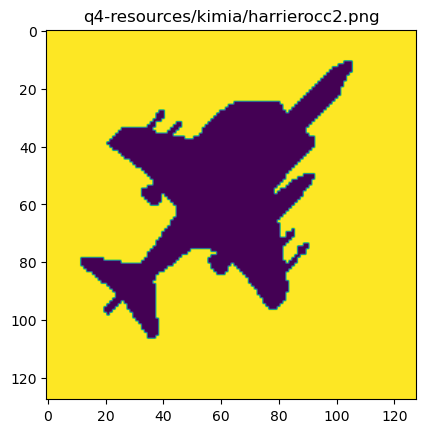

array([-0.73487342,  0.67820429])

In [9]:
other_image = 56

pil_image = Image.open(image_files[other_image])
other_image_array = np.array(pil_image)
plt.imshow(other_image_array)
plt.title(image_files[other_image])
plt.show()

other_image = get_black_points(other_image_array)

other_pca = PCA(n_components=1)
other_pca.fit(other_image)
other_component = other_pca.components_[0]
other_component = other_component/np.linalg.norm(other_component)

other_component

In [10]:
angle = np.arccos(other_component@pca_componenent)
np.degrees(angle)

95.67464223292238

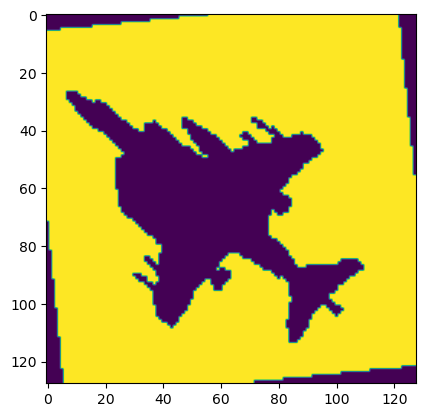

In [11]:
img = pil_image
rotated_img = img.rotate(np.degrees(angle))
plt.imshow(rotated_img)
plt.show()

## Writing a combined function for the task

In [12]:
def orient_image(template_index, other_image, show_template_image = False):
    pil_image = Image.open(image_files[template_index])
    image_array = np.array(pil_image)
    if show_template_image:
        plt.imshow(image_array)
        plt.title("Template Image: {}".format(image_files[rand_ind]))
        plt.show()
    
    template_image = get_black_points(image_array)
    
    pca = PCA(n_components=1)
    pca.fit(template_image)
    pca_componenent = pca.components_[0]
    pca_componenent = pca_componenent/np.linalg.norm(pca_componenent)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    
    pil_image = Image.open(image_files[other_image])
    other_image_array = np.array(pil_image)
    axes[0].imshow(other_image_array)
    axes[0].set_title("Other Image: {}".format(image_files[other_image]))

    other_image = get_black_points(other_image_array)

    other_pca = PCA(n_components=1)
    other_pca.fit(other_image)
    other_component = other_pca.components_[0]
    other_component = other_component/np.linalg.norm(other_component)
    
    angle = np.arccos(other_component@pca_componenent)
    
    
    img = pil_image
    rotated_img = img.rotate(np.degrees(np.pi + angle))
    axes[1].imshow(rotated_img)
    axes[1].set_title("Oriented Image")
    plt.show()


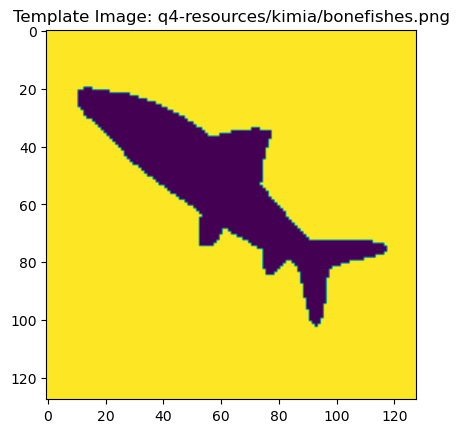

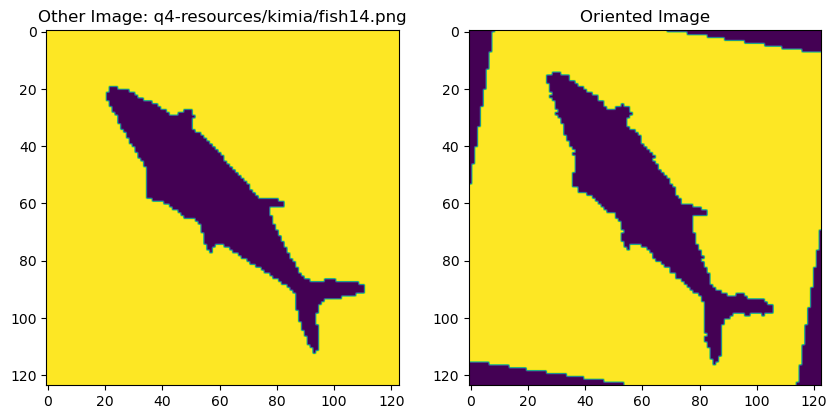

In [13]:
orient_image(0, 38, show_template_image=True)

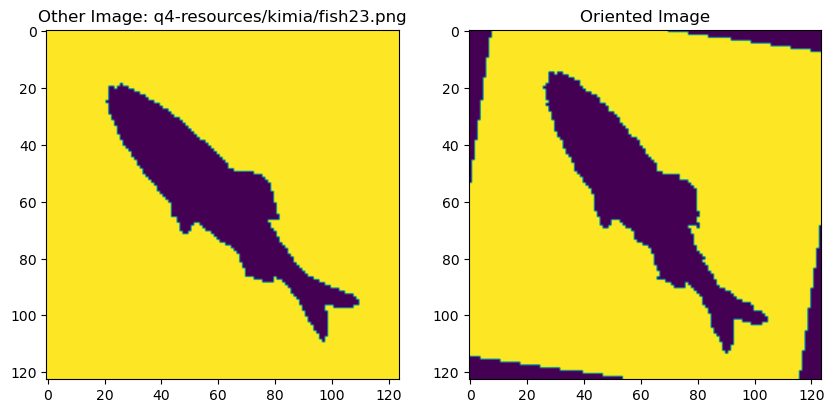

In [14]:
orient_image(0, 39)

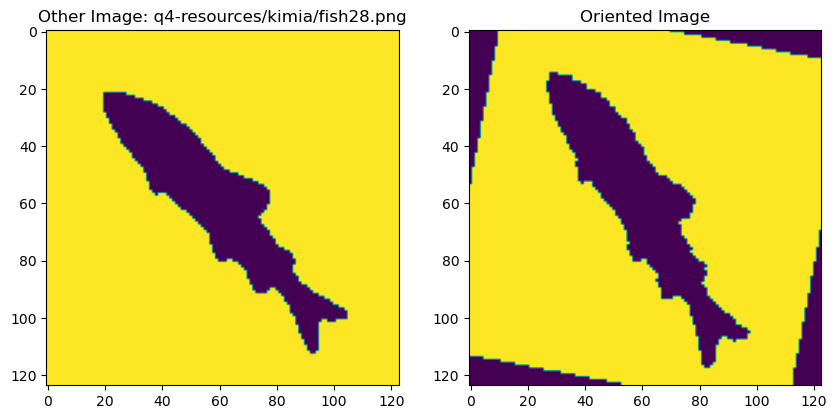

In [15]:
orient_image(0, 40)

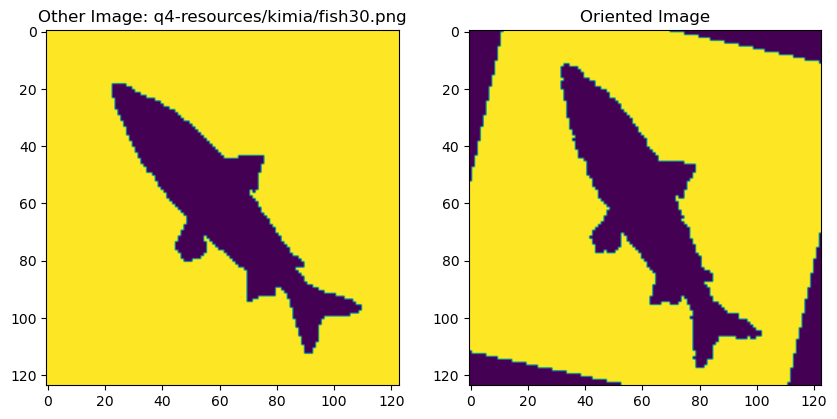

In [16]:
orient_image(0, 41)

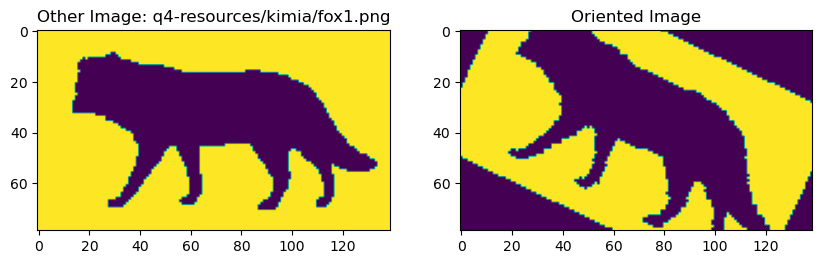

In [17]:
orient_image(0, 42)

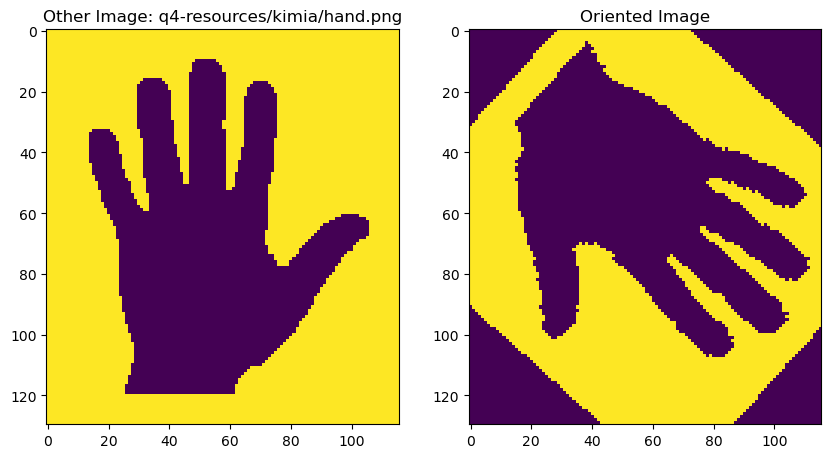

In [18]:
orient_image(0, 43)

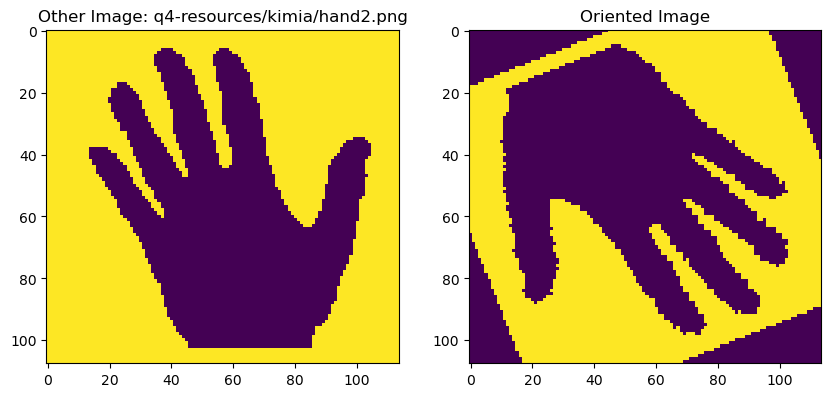

In [19]:
orient_image(0, 44)